### Data mining 2019 Project 2
# Crime Data Analysis 
<div style="text-align: right"> Ιγιάμου Περισανίδης Σίμων - sdi1600051 </div>
<div style="text-align: right"> Πυθαρούλιος Κωνσταντίνος- sdi1600142 </div>

Necessary imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

## Preprocessing
Read the csv file and turn it into a dataframe.

In [2]:
filename = "crime.csv"
df = pd.read_csv(filename, engine='python')
#df = df.sample(n=1000, random_state=1) # comment this line

Replace NaNs with N in the 'SHOOTING' column.

In [3]:
df["SHOOTING"].fillna("N", inplace=True)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


# 1. Plots
 In order to find how many crimes were made each year, we are going to use group by based on year.

In [4]:
year_df = df.groupby(['YEAR']).size().reset_index(name='Number Of Crimes')

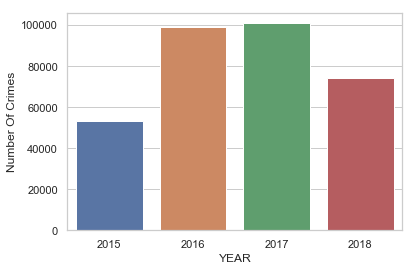

In [5]:
sns.set(style="whitegrid")
ax = sns.barplot(x="YEAR", y="Number Of Crimes", data=year_df)

In ordeer to find how many crimes were made each month, we are going to use group by based on month.

In [6]:
month_df = df.groupby(['MONTH']).size().reset_index(name='Number Of Crimes')

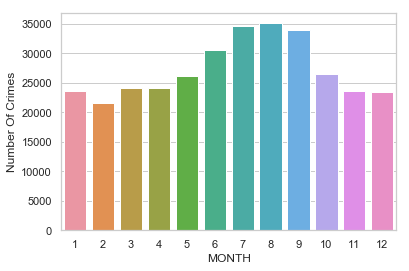

In [7]:
sns.set(style="whitegrid")
ax = sns.barplot(x="MONTH", y="Number Of Crimes", data=month_df)

In order to find how many crimes were made each day of the week, we are going to use group by based on day of week.

In [8]:
dayofweek_df = df.groupby(['DAY_OF_WEEK']).size().reset_index(name='Number Of Crimes')

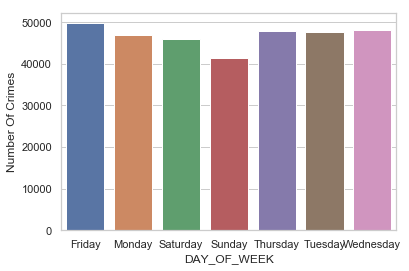

In [9]:
sns.set(style="whitegrid")
ax = sns.barplot(x="DAY_OF_WEEK", y="Number Of Crimes", data=dayofweek_df)

In order to find how many crimes were made on each district, we are going to use group by based on district.

In [10]:
district_df = df.groupby(['DISTRICT']).size().reset_index(name='Number Of Crimes')

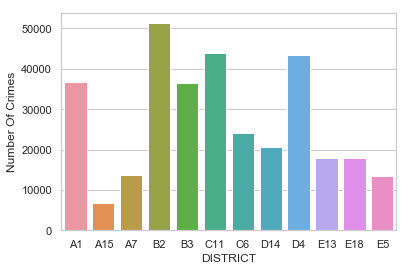

In [11]:
sns.set(style="whitegrid")
ax = sns.barplot(x="DISTRICT", y="Number Of Crimes", data=district_df)

# 2. Shootings analysis

At first we delete from the data frame, the rows whoes column SHOOTING is "No".

In [12]:
shootings_df = df[df.SHOOTING != "N"]
shootings_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1052,I182078893,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part One,WASHINGTON ST,42.281647,-71.071118,"(42.28164735, -71.07111848)"
1053,I182078893,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part Two,WASHINGTON ST,42.281647,-71.071118,"(42.28164735, -71.07111848)"
1074,I182078872,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,330,Y,2018-09-29 19:21:00,2018,9,Saturday,19,Part One,SEAVER ST,42.304554,-71.082954,"(42.30455372, -71.08295366)"
1907,I182077958,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part One,MORTON ST,42.283746,-71.089382,"(42.28374593, -71.08938232)"
1908,I182077958,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part Two,MORTON ST,42.283746,-71.089382,"(42.28374593, -71.08938232)"


### Finding in which year have the most crimes occured
We are grouping the crimes by the year 

In [13]:
shootings_year_df = shootings_df.groupby(['SHOOTING','YEAR']).size().reset_index(name='Number Of Shootings')
shootings_year_df

,SHOOTING,YEAR,Number Of Shootings
0,Y,2015,185
1,Y,2016,279
2,Y,2017,371
3,Y,2018,220


Finding the index of row with the maximun number of shootings -> the index of year with the most shootings

In [14]:
max_year_shootings_df = shootings_year_df["Number Of Shootings"].idxmax()
max_year_shootings_df

2

Finding our solution...

In [15]:
max_year_shootings_index = shootings_year_df['Number Of Shootings'].idxmax() # we find the index of the row with maximun number of shootings
max_year_shootings = shootings_year_df.loc[max_year_shootings_index,"Number Of Shootings"] # we keep the maximun number of shootings
max_year_shootings_df = shootings_year_df.loc[shootings_year_df['Number Of Shootings'] == max_year_shootings]
max_year_shootings_df.drop(['SHOOTING'],1,inplace=True)

print("The year/years with the most shootings is/are:")
max_year_shootings_df

The year/years with the most shootings is/are:


C:\Users\Simon\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,YEAR,Number Of Shootings
2,2017,371


### Finding in which district have the most crimes with shootings occured

In order to find which district the most crimes with shootings occure we will group the crimes by their districts, and then do the same as above

In [16]:
shootings_df
shootings_district_df = shootings_df.groupby(['SHOOTING','DISTRICT']).size().reset_index(name='Number Of Shooting Crimes')
shootings_district_df

,SHOOTING,DISTRICT,Number Of Shooting Crimes
0,Y,A1,12
1,Y,A15,5
2,Y,A7,17
3,Y,B2,352
4,Y,B3,227
5,Y,C11,195
6,Y,C6,41
7,Y,D14,21
8,Y,D4,59
9,Y,E13,70


In [17]:
max_district_shootings_df = shootings_district_df["Number Of Shooting Crimes"].idxmax()
max_district_shootings_df

3

In [18]:
max_district_shootings_index = shootings_district_df['Number Of Shooting Crimes'].idxmax() # we find the index of the row with maximun number of shootings
max_district_shootings = shootings_district_df.loc[max_district_shootings_index,"Number Of Shooting Crimes"] # we keep the maximun number of shootings
max_district_shootings_df = shootings_district_df.loc[shootings_district_df['Number Of Shooting Crimes'] == max_district_shootings]
max_district_shootings_df.drop(['SHOOTING'],1,inplace=True)


print("The district/districts with the most shooting crimes is/are:")
max_district_shootings_df

The district/districts with the most shooting crimes is/are:


,DISTRICT,Number Of Shooting Crimes
3,B2,352


# 3. Day or night

Add a column which represents whether the crime has happend during the day or at night. The crimes that happend on hours from 6am to 6pm will be considered as day, while the rest will be labeled as night.

In [20]:
for index, row in df.iterrows():
    if (row['HOUR'] <= 6 or row['HOUR'] > 18):
        df.loc[index,'NIGHT'] = True
    else:
        df.loc[index,'NIGHT'] = False

df.head(10)

# Count occurences
df.groupby(['NIGHT']).size().reset_index(name='Count')

,NIGHT,Count
0,False,205176
1,True,122644


As we see, there are __ crimes that happend during the day and __ that happened during the night.

# 4. Most frequent crime during daytime

By using the information from the columns NIGHT and OFFENSE_CODE_GROUP, we can now find which is the crime that happends most often during daytime. 

In [21]:
# Create a mask for the crimes that happend during day.
nightMask = (df['NIGHT']==False)
# Group by OFFENSE_CODE_GROUP, and get the max count.
df[nightMask].groupby(['OFFENSE_CODE_GROUP']).size().reset_index(name='Count').max()

OFFENSE_CODE_GROUP    Warrant Arrests
Count                           24222
dtype: object

The most crimes that happen during the day belong to the __ group.

# 5. Clustering

In [22]:
location_df = df[["Lat", "Long"]]

# Here we replace any empty strings of columns with np.nan objects
location_df.replace('', np.nan, inplace=True)
# We drop NaNs with 0 because KMeans doesn't work with NaNs
location_df = location_df.dropna()
# Removing outliers
location_df = location_df.loc[(location_df['Lat']>40) & (location_df['Long']<-60)] 

location_df.head()

C:\Users\Simon\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Lat,Long
0,42.262608,-71.121186
1,42.352111,-71.135311
2,42.308126,-71.076930
3,42.359454,-71.059648
4,42.375258,-71.024663


We first try a scatter plot

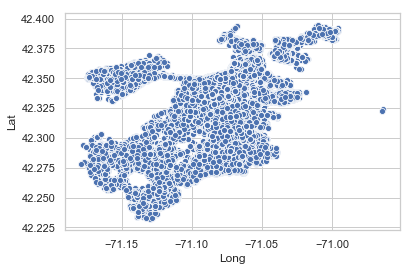

In [23]:
ax = sns.scatterplot(x="Long", y="Lat", data = location_df)

 same thing with matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

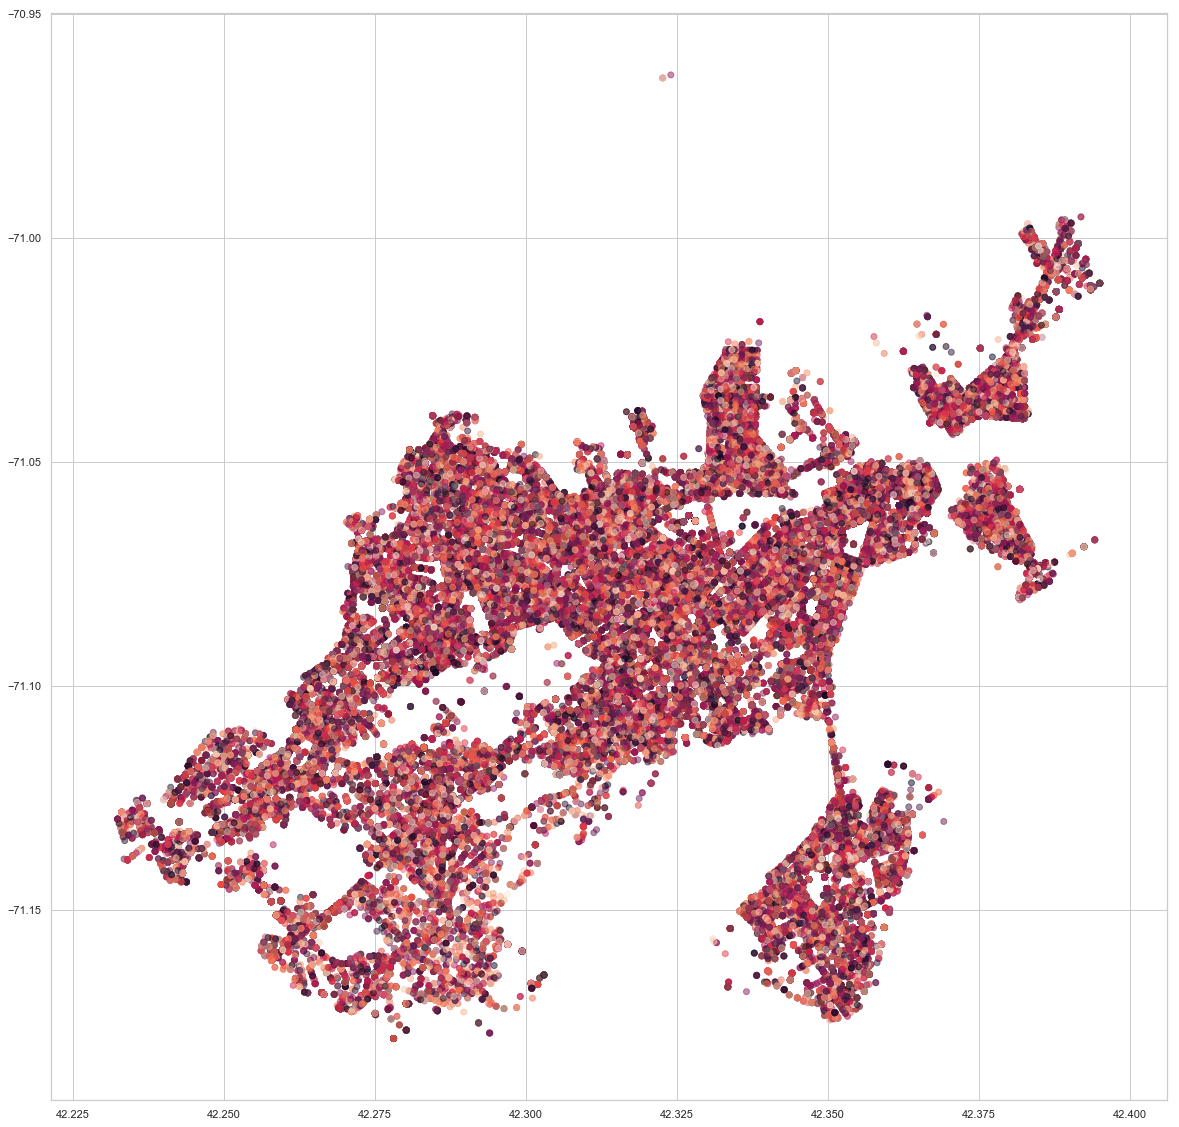

In [24]:
x = location_df['Lat']
y = location_df['Long']
colors = np.random.rand(len(location_df))
plt.figure(figsize=(20,20))
plt.scatter(x,y, c =colors, alpha = 0.5)
plt.show

### Clusters = 2

[[ 42.30148596 -71.09886493]
 [ 42.34562437 -71.0648723 ]]


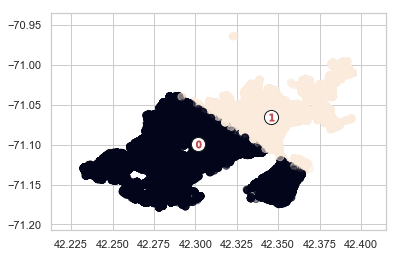

In [25]:
kmeans = KMeans(n_clusters=2).fit(location_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(location_df['Lat'], location_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 3

[[ 42.3023484  -71.07757223]
 [ 42.35061952 -71.06395409]
 [ 42.30701967 -71.13016863]]


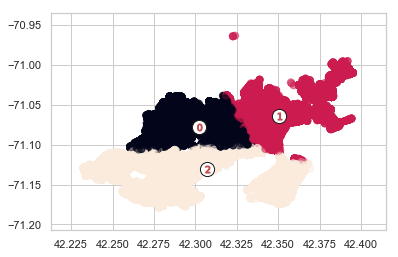

In [26]:
kmeans = KMeans(n_clusters=3).fit(location_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(location_df['Lat'], location_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 5 

[[ 42.35054218 -71.14312353]
 [ 42.29765673 -71.07233764]
 [ 42.35740822 -71.05333812]
 [ 42.33151897 -71.08686155]
 [ 42.27243059 -71.12521499]]


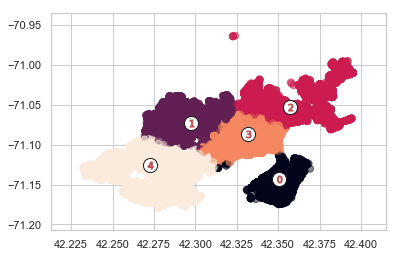

In [27]:
kmeans = KMeans(n_clusters=5).fit(location_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(location_df['Lat'], location_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 10

[[ 42.33891223 -71.08099635]
 [ 42.31960714 -71.09970706]
 [ 42.2608147  -71.12028474]
 [ 42.28288396 -71.08549186]
 [ 42.35977155 -71.06107662]
 [ 42.35056679 -71.14312402]
 [ 42.30310388 -71.06793804]
 [ 42.28213921 -71.14211439]
 [ 42.37755385 -71.03059465]
 [ 42.33078765 -71.05129492]]


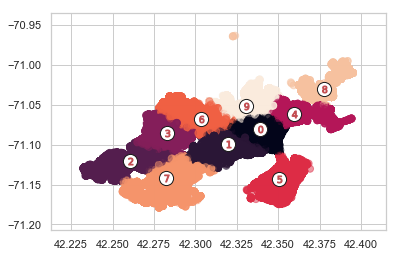

In [28]:
kmeans = KMeans(n_clusters=10).fit(location_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(location_df['Lat'], location_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

## Clustering with Location, OFFENSE_CODE

In [29]:
offense_df = df[["Lat","Long", "OFFENSE_CODE"]]
offense_df.head()

# Here we replace any empty strings of columns with np.nan objects
offense_df.replace('', np.nan, inplace=True)
# We drop NaNs because KMeans doesn't work with NaNs
offense_df = offense_df.dropna()
# Removing outliers
offense_df = offense_df.loc[(offense_df['Lat']>40) & (offense_df['Long']<-60)] 

offense_df.head()

C:\Users\Simon\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Lat,Long,OFFENSE_CODE
0,42.262608,-71.121186,2403
1,42.352111,-71.135311,3201
2,42.308126,-71.076930,2647
3,42.359454,-71.059648,413
4,42.375258,-71.024663,3122


We first try a scatter plot

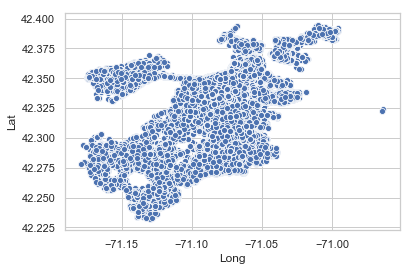

In [30]:
ax = sns.scatterplot(x="Long", y="Lat", data = offense_df)

### Clusters = 2

[[  42.32060345  -71.08356906 3206.67093045]
 [  42.32479155  -71.08176413  949.7543766 ]]


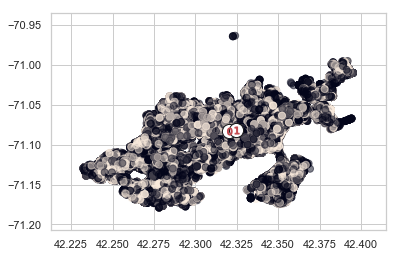

In [31]:
kmeans = KMeans(n_clusters=2).fit(offense_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(offense_df['Lat'], offense_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 3

[[  42.32042239  -71.08365492 3221.90583836]
 [  42.32610415  -71.08214389  672.17947985]
 [  42.32236075  -71.08067169 1679.78842336]]


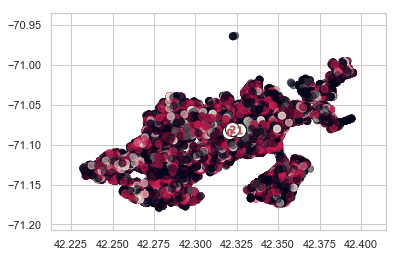

In [32]:
kmeans = KMeans(n_clusters=3).fit(offense_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(offense_df['Lat'], offense_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 5

[[  42.32646593  -71.08177843  622.33805314]
 [  42.32125962  -71.08320892 3142.05082616]
 [  42.32188513  -71.08173929 1518.0894336 ]
 [  42.31793979  -71.08538824 3748.05148438]
 [  42.32193937  -71.08222522 2598.12667027]]


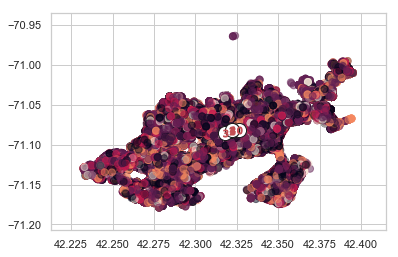

In [33]:
kmeans = KMeans(n_clusters=5).fit(offense_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(offense_df['Lat'], offense_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 10

[[  42.31763581  -71.08407143 3388.31814091]
 [  42.32821899  -71.08129113  675.02415968]
 [  42.32253007  -71.08023542 1872.67465181]
 [  42.3216938   -71.08220704 2612.62878365]
 [  42.32096556  -71.08145556 1406.65083634]
 [  42.3229777   -71.08245412 3136.33374129]
 [  42.31999179  -71.08511925 3815.29546159]
 [  42.31880009  -71.08464839 2981.02927161]
 [  42.32159879  -71.08300204  431.13787288]
 [  42.32273858  -71.08523226 1091.4176983 ]]


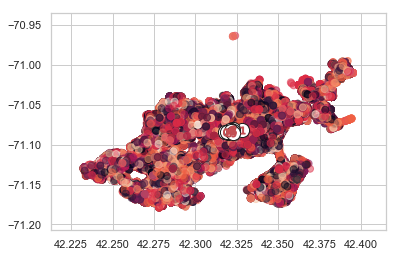

In [34]:
kmeans = KMeans(n_clusters=10).fit(offense_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(offense_df['Lat'], offense_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

## Clustering with Location, Month

In [35]:
month_df = df[["Lat","Long", "MONTH"]]
month_df.head()

# Here we replace any empty strings of columns with np.nan objects
month_df.replace('', np.nan, inplace=True)
# We drop NaNs because KMeans doesn't work with NaNs
month_df = month_df.dropna()
# Removing outliers
month_df =month_df.loc[(month_df['Lat']>40) & (month_df['Long']<-60)] 

month_df.head()

C:\Users\Simon\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Lat,Long,MONTH
0,42.262608,-71.121186,10
1,42.352111,-71.135311,8
2,42.308126,-71.076930,10
3,42.359454,-71.059648,10
4,42.375258,-71.024663,10


Again, we first try a scatter plot

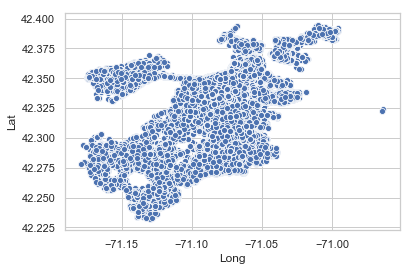

In [36]:
ax = sns.scatterplot(x="Long", y="Lat", data = month_df)

### Clusters = 2

[[ 42.32254847 -71.0828053    9.22972891]
 [ 42.32198986 -71.08288368   3.65944323]]


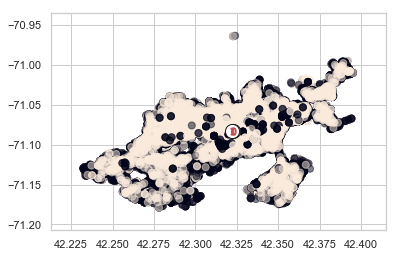

In [37]:
kmeans = KMeans(n_clusters=2).fit(month_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(month_df['Lat'], month_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 3

[[ 42.32224686 -71.0828142    6.62104007]
 [ 42.3226356  -71.08291872  10.34530154]
 [ 42.3219579  -71.08278856   2.51741328]]


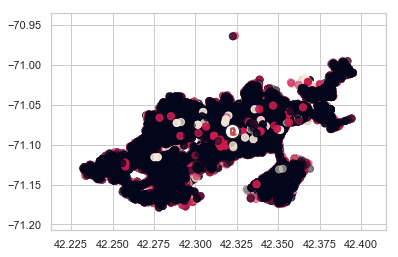

In [38]:
kmeans = KMeans(n_clusters=3).fit(month_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(month_df['Lat'], month_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 5

[[ 42.32241358 -71.0826297    7.50255819]
 [ 42.32190705 -71.08288446   2.00187993]
 [ 42.3222008  -71.08296458  11.49917724]
 [ 42.32206089 -71.08288301   5.0810943 ]
 [ 42.32297757 -71.08288266   9.43775264]]


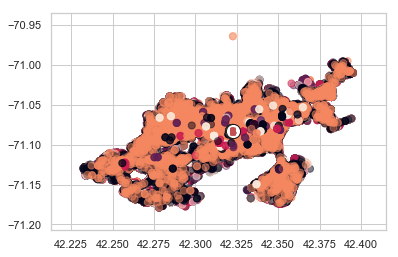

In [39]:
kmeans = KMeans(n_clusters=5).fit(month_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(month_df['Lat'], month_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

### Clusters = 10

[[ 42.32211294 -71.08300856   6.        ]
 [ 42.3222008  -71.08296458  11.49917724]
 [ 42.32196055 -71.08277594   3.        ]
 [ 42.322474   -71.08261161   8.        ]
 [ 42.32187881 -71.08294174   1.47504473]
 [ 42.32195962 -71.08307775   5.        ]
 [ 42.32288219 -71.08314463   9.        ]
 [ 42.32310008 -71.08254619  10.        ]
 [ 42.32235254 -71.08264797   7.        ]
 [ 42.32210416 -71.08251277   4.        ]]


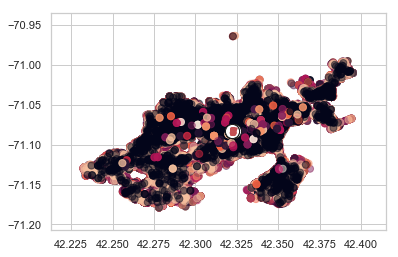

In [40]:
kmeans = KMeans(n_clusters=10).fit(month_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(month_df['Lat'], month_df['Long'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#different number for every cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

# 6. Visualising crimes on an interactive map

Let's use a random subset of 1000 crimes.

In [2]:
dfsub = df.sample(n=1000, random_state=1)

We use a python library called folium in order to create an interactive map that displays how many crimes have happend on each location.  

Create a base map for Boston.

In [3]:
import folium

m = folium.Map(location=[42.3400, -71.0589],
               tiles='Stamen Terrain',
               zoom_start=11.5)

Make marker clusters to display the crimes on the map. This way we can visualize which are the most dangerous areas of Boston.

In [4]:
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(m)

# For every crime
for index, row in dfsub.iterrows():
    # If there is information about its location
    if not np.isnan(row['Lat']) and not np.isnan(row['Long']):
        # Add it to the marker cluster
        folium.Circle(
            radius=50,
            location=[row['Lat'], row['Long']],
            color='#3186cc',
            fill=True,
            fill_color='#3186cc'
        ).add_to(marker_cluster)

# Display the map with the clusters        
m

As we see, many crimes have occured at the center of Boston, but the most crimes have happen souther, near the middle of Washington St.